## Why: In the United States, approximately 40% of people will be diagnosed with cancer at some point in their lives. In my life I have lost my godfather and stepmother to cancer over  the last ten years. My motivation is to explore if there are factors that are associated with higher risks for cancer. 

# Why Lung Cancer?


# Lung cancer remains the most commonly diagnosed cancer in the United States. Males are generally at a higher lifetime risk of developing lung cancer. 

In [11]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
import sklearn

import plotly.express as px
import plotly.io as pio

from collections import Counter


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_csv('survey lung cancer.csv')

In [13]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [112]:
print(len(df['GENDER']))

309


In [15]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [17]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

33

In [18]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## What do the Cancer rates look like for this dataset?

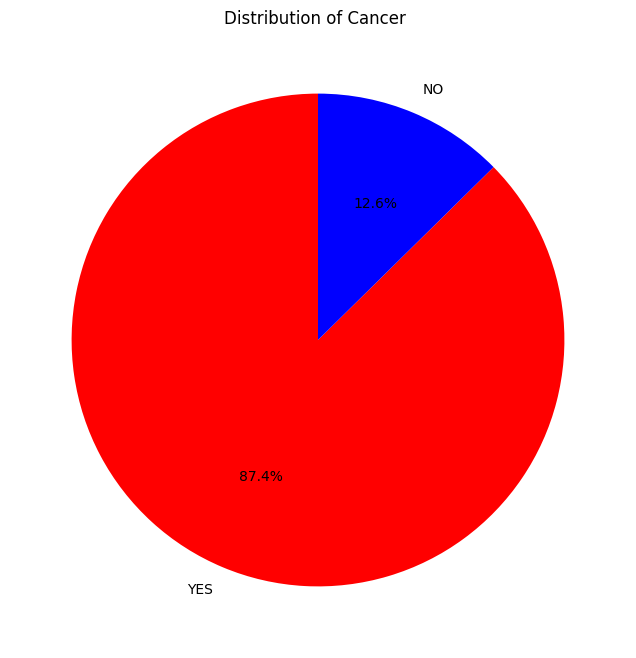

In [19]:
# Count the occurrences of each level
level_counts = df['LUNG_CANCER'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# Adding a title
plt.title('Distribution of Cancer ')
plt.show()

In [24]:
df['AGE'].value_counts()

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [25]:
df['AGE'].mean()

62.67313915857605

## Observation:

Average age is 62 so this dataset is made up of an older population. Therefore insights gained from this should not be generalized.

In [26]:
mean_ = np.mean(df['AGE'])
std_ = np.std(df['AGE'])
median_ = np.median(df['AGE'])

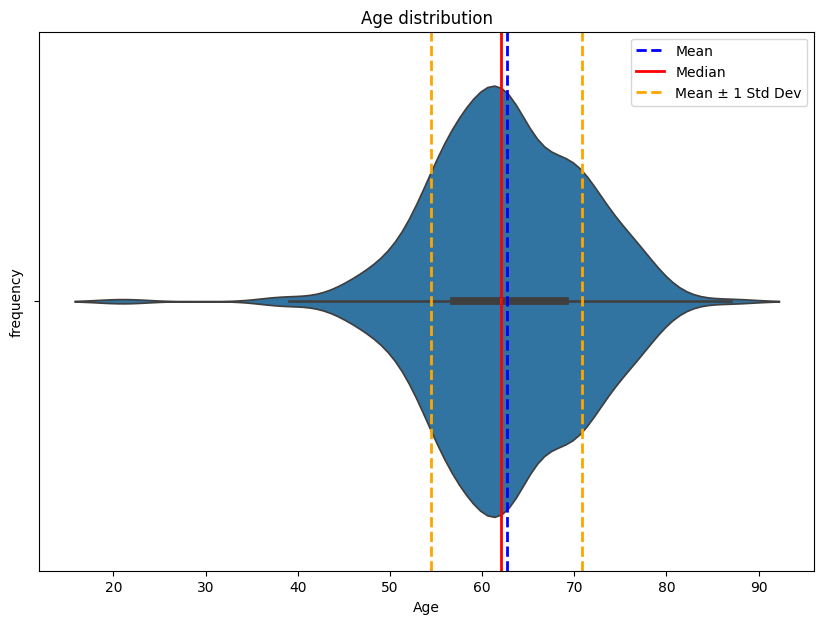

In [27]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='AGE', data=df, ax=ax)

#Lable axis

ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_title('Age distribution')

ax.axvline(mean_, color='blue', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median_, color='red', linestyle='solid', linewidth=2, label='Median')
ax.axvline(mean_ + std_, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
ax.axvline(mean_ - std_, color='orange', linestyle='dashed', linewidth=2)

ax.legend()
plt.show()

In [48]:
# Calculating statistics
mean = np.mean(df['AGE'])
median = np.median(df['AGE'])
std_dev = np.std(df['AGE'])

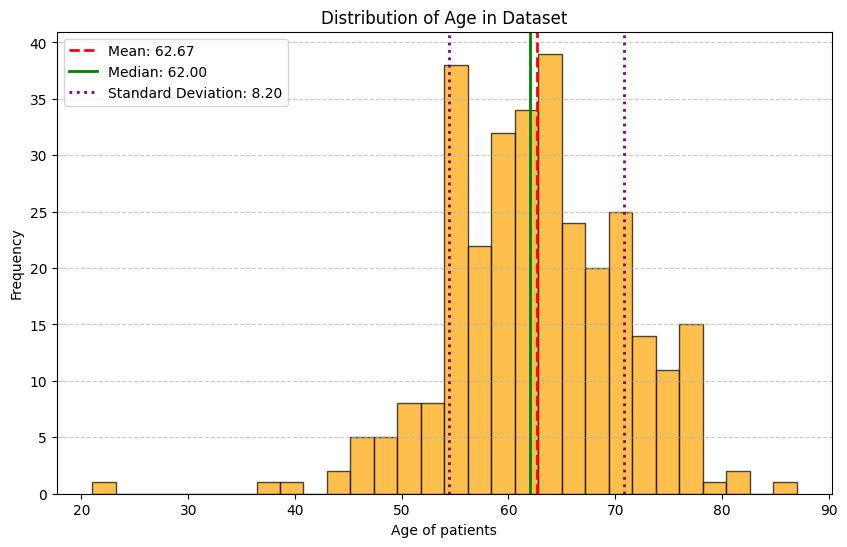

In [50]:
#Histogram
plt.figure(figsize=(10,6))
plt.hist(df['AGE'], bins=30, color='orange', edgecolor='black',alpha = 0.7)


# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='solid', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=2)


plt.xlabel('Age of patients')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Dataset')

plt.legend()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

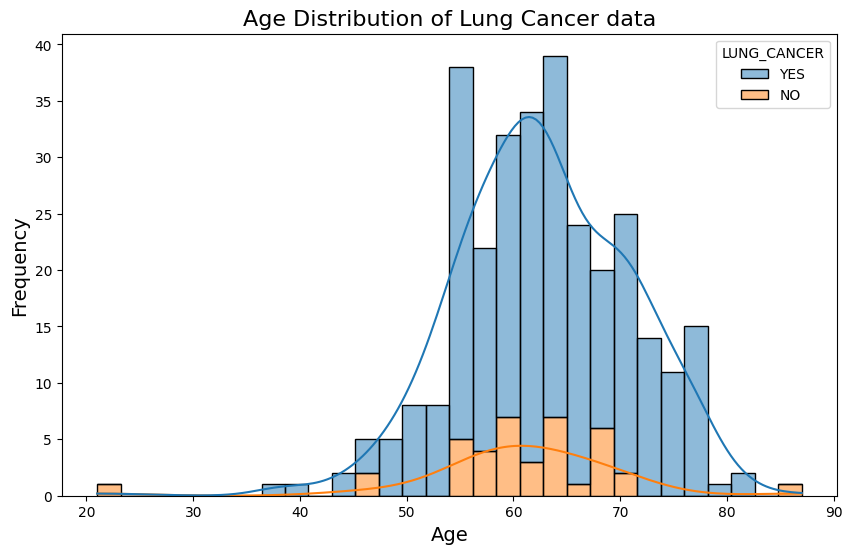

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='AGE', hue='LUNG_CANCER', multiple='stack',bins=30, kde=True)

plt.title('Age Distribution of Lung Cancer data', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

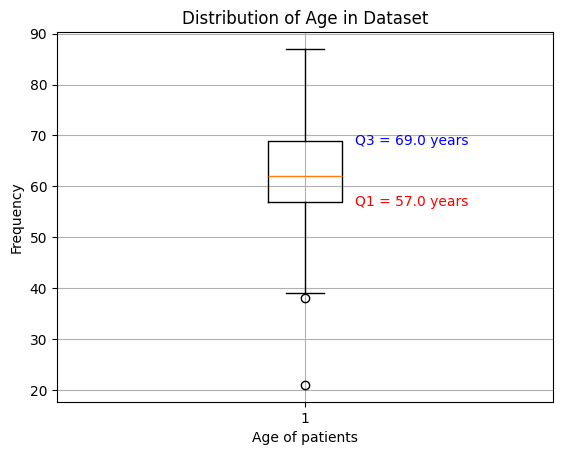

In [47]:
#Boxplot
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)

IQR = Q3 - Q1

plt.boxplot(df['AGE'])

plt.xlabel('Age of patients')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Dataset')

# Annotate IQR on the plot
plt.text(1.1, Q3, f'Q3 = {Q3:.1f} years', verticalalignment='center', fontsize=10, color='blue')
plt.text(1.1, Q1, f'Q1 = {Q1:.1f} years', verticalalignment='center', fontsize=10, color='red')

# Show plot
plt.grid(True)
plt.show()

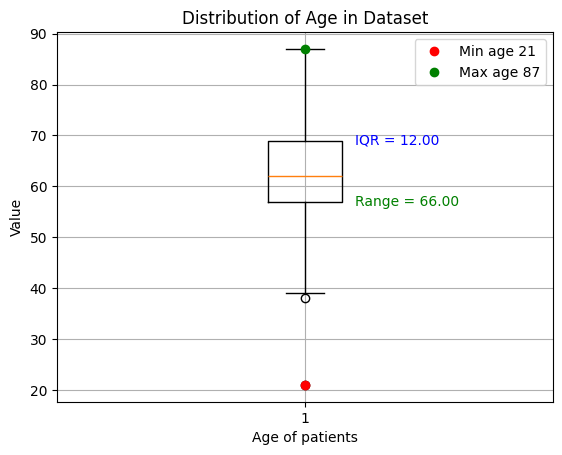

In [42]:
# Calculate IQR and Range
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
age_min = df['AGE'].min()
age_max = df['AGE'].max()
age_range = age_max - age_min

# Create the boxplot
plt.boxplot(df['AGE'])

# Labels and title
plt.xlabel('Age of patients')
plt.ylabel('Value')
plt.title('Distribution of Age in Dataset')

# Annotate IQR and Range
plt.text(1.1, Q3, f'IQR = {IQR:.2f}', verticalalignment='center', fontsize=10, color='blue')
plt.text(1.1, Q1, f'Range = {age_range:.2f}', verticalalignment='center', fontsize=10, color='green')

# Optional: mark min and max on plot
plt.plot(1, age_min, 'ro', label=f'Min age {age_min}')
plt.plot(1, age_max, 'go', label=f'Max age {age_max}')
plt.legend()

# Grid and display
plt.grid(True)
plt.show()

## Observation: 50% of patients are between ages 57-69.

## Question: Does Gender play a role in Cancer?

In [53]:
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

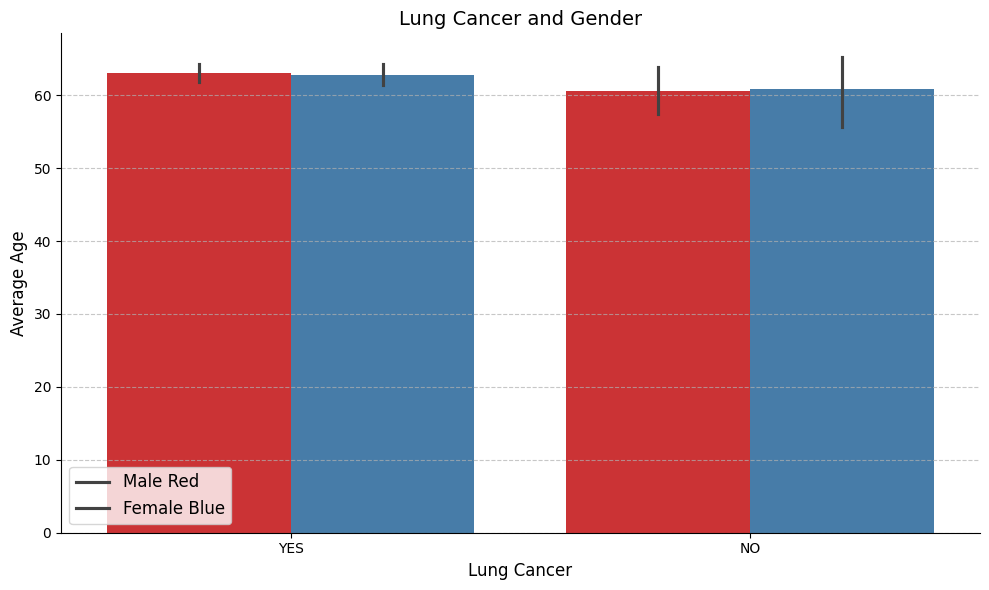

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure size
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=df,
            x='LUNG_CANCER',
            y='AGE',
            hue='GENDER',
            palette='Set1')

# labels and title
plt.xlabel('Lung Cancer', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Lung Cancer and Gender', fontsize=14)

# Remove top and right spines
sns.despine()

# legend
plt.legend(labels=['Male Red','Female Blue'],fontsize=12)

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

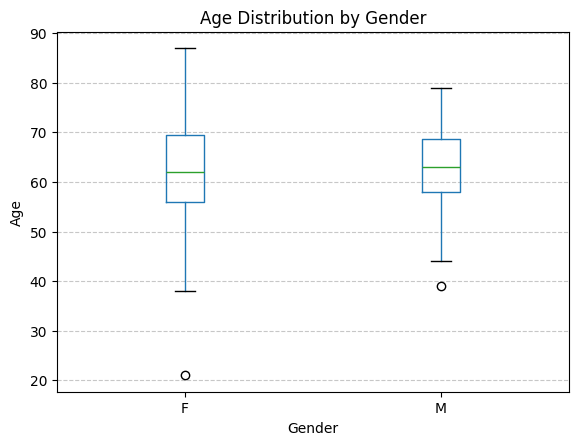

In [55]:
# Plotting boxplot
plt.figure(figsize=(10, 8))
df.boxplot(column='AGE', by='GENDER', grid=False)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('Gender')
plt.ylabel('Age')
# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
grouped = df.groupby('LUNG_CANCER')['AGE']

In [57]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
LUNG_CANCER,,,,,,,,
NO,39.0,60.743590,9.629226,21.0,57.0,61.0,65.5,87.0
YES,270.0,62.951852,7.966560,38.0,58.0,62.5,69.0,81.0


<Figure size 800x600 with 0 Axes>

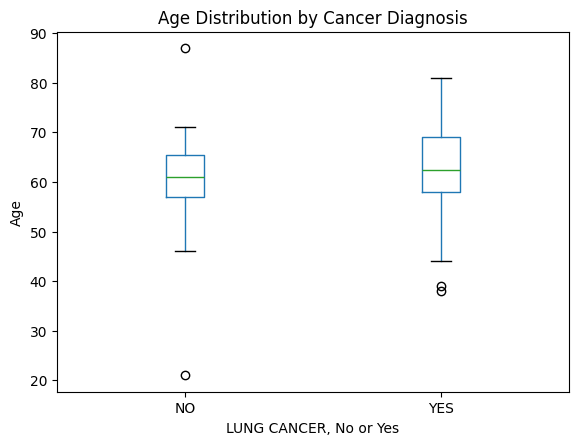

In [58]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='AGE', by='LUNG_CANCER', grid=False)

# Adding labels and title
plt.title('Age Distribution by Cancer Diagnosis')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('LUNG CANCER, No or Yes')
plt.ylabel('Age')
plt.show()

## Can I use a correlation matrix to gain insight on how the features in the dataset interact?

## Preprocessing

In [62]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [63]:
df_encoded = df.copy()

In [64]:
df_encoded['LUNG_CANCER'].head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [65]:
#Binary features mapping

binary_column = ['LUNG_CANCER']


df_encoded[binary_column] = df_encoded[binary_column].apply(lambda x : x.map({'YES':1, 'NO':0}))

In [66]:
df_encoded['GENDER'].head()

0    M
1    M
2    F
3    M
4    F
Name: GENDER, dtype: object

In [67]:
#Gender column

Gender_column = ['GENDER']

df_encoded[Gender_column] = df_encoded[Gender_column].apply(lambda x : x.map({'M':1, 'F':0}))

## Scaling features

In [68]:
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [69]:
from sklearn.preprocessing import StandardScaler

continuous_numeric_column = ['AGE']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[continuous_numeric_column] = scaler.fit_transform(df_encoded[continuous_numeric_column])

In [74]:
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.771850,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,1.381829,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,-0.448107,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,0.039876,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,0.039876,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [75]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [70]:
#Calculate the Correlation Matrix
correlation_matrix = df_encoded.corr()

In [71]:
print(correlation_matrix)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133

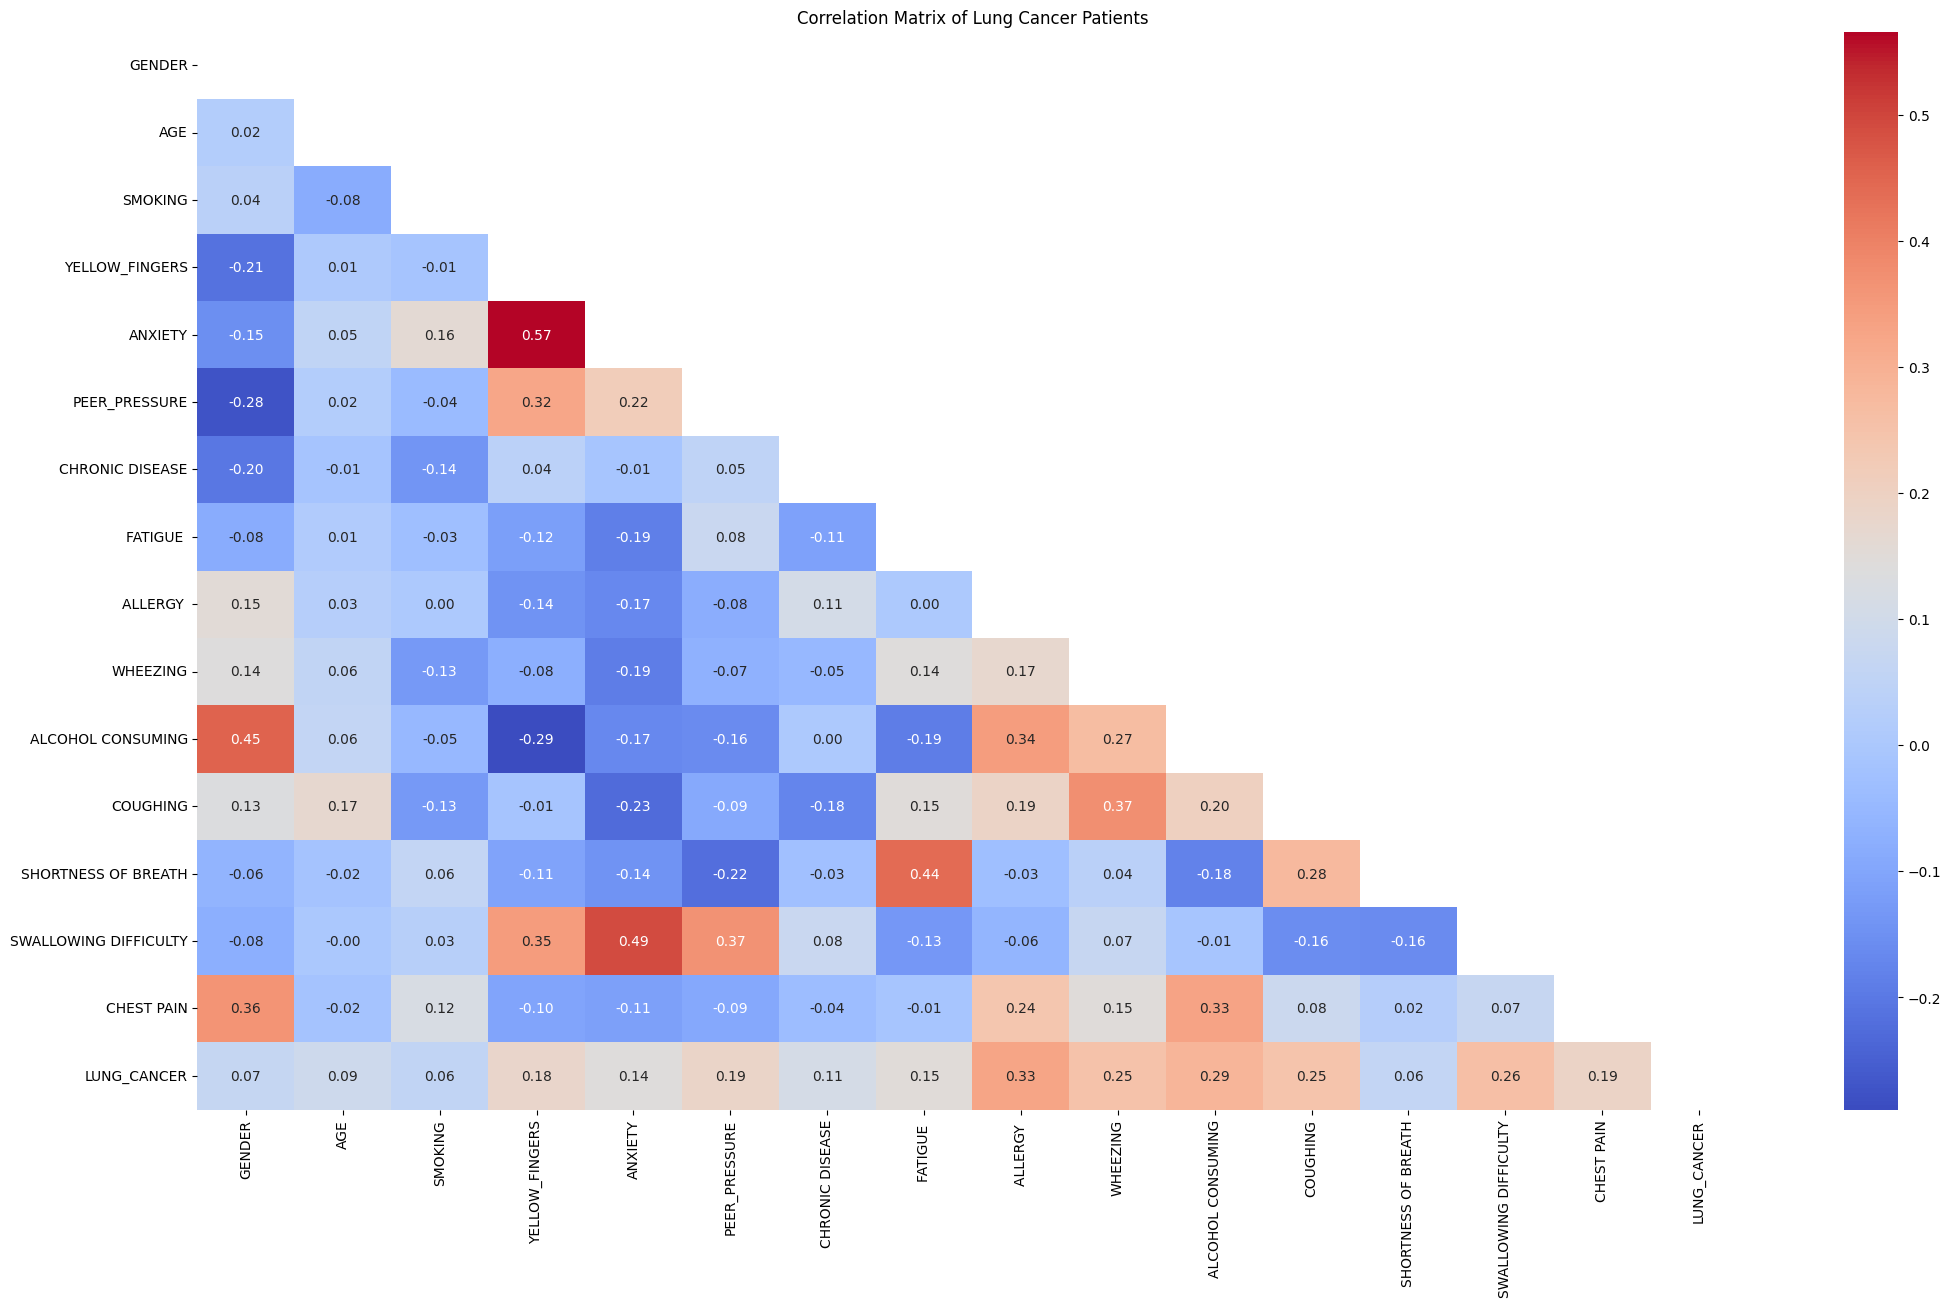

In [73]:
#Plot the Correlation Matrix
plt.figure(figsize=(25, 14))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Lung Cancer Patients')

plt.show()

## Observations: Correlation between Allergy, Alcohol consumption, coughing, yellow fingers and chest pain. 

# Clustering

In [76]:
df_cluster = df_encoded.copy()

In [78]:
from sklearn.preprocessing import StandardScaler

X = df_cluster.drop('LUNG_CANCER', axis=1)


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


## PCA:

Using Principal Component Analysis for dimensionality reduction. 

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

In [127]:
#Kmeans clustering
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=10, random_state= 42)
clusters = kmeans.fit_predict(X_pca)

In [128]:
cluster_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
cluster_df['Cluster'] = clusters

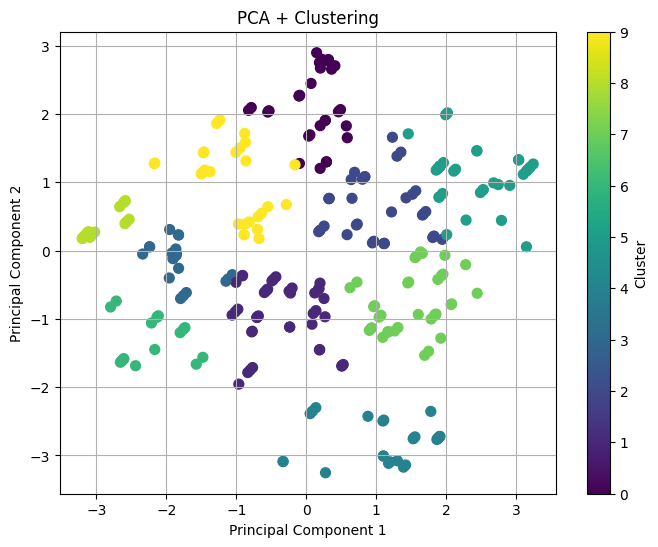

In [129]:
#Visualization of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(cluster_df['PC1'], cluster_df['PC2'], c=cluster_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

### Evaluate clusters

In [130]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.4560242955792626


### Observation:

Silhouette Score is a bit low. Tuning is needed or perhaps trying different clustering Algorithms or perhaps clustering without using PCA.

In [135]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append((k, score))
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.394
k = 3, Silhouette Score = 0.384
k = 4, Silhouette Score = 0.421
k = 5, Silhouette Score = 0.417
k = 6, Silhouette Score = 0.391
k = 7, Silhouette Score = 0.419
k = 8, Silhouette Score = 0.427
k = 9, Silhouette Score = 0.444
k = 10, Silhouette Score = 0.456
k = 11, Silhouette Score = 0.465
k = 12, Silhouette Score = 0.473
k = 13, Silhouette Score = 0.485
k = 14, Silhouette Score = 0.481
k = 15, Silhouette Score = 0.475
k = 16, Silhouette Score = 0.473
k = 17, Silhouette Score = 0.483
k = 18, Silhouette Score = 0.486
k = 19, Silhouette Score = 0.505
k = 20, Silhouette Score = 0.506
k = 21, Silhouette Score = 0.482
k = 22, Silhouette Score = 0.487
k = 23, Silhouette Score = 0.499
k = 24, Silhouette Score = 0.504
k = 25, Silhouette Score = 0.512
k = 26, Silhouette Score = 0.507
k = 27, Silhouette Score = 0.507
k = 28, Silhouette Score = 0.502
k = 29, Silhouette Score = 0.497


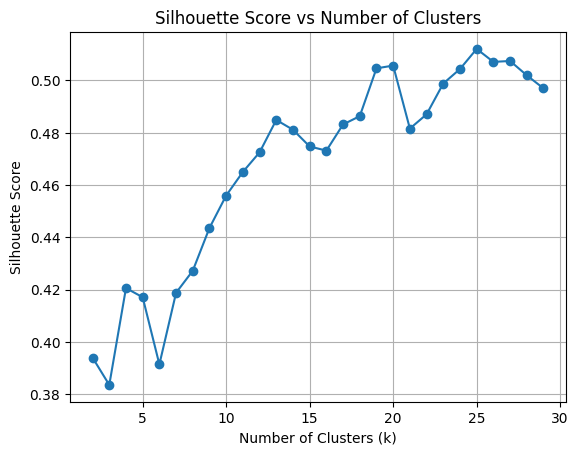

In [136]:
#Elbow to visualize best cluster number
k_vals, silhouette_vals = zip(*scores)

plt.plot(k_vals, silhouette_vals, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [137]:
#DBSCAN sice Kmeans is not finding good groups
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

In [138]:
print("Silhouette Score (DBSCAN):", silhouette_score(X_pca, labels))

Silhouette Score (DBSCAN): 0.4969955580117692


### Improvement over Kmeans.

In [139]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)
print("Silhouette Score (Agglomerative):", silhouette_score(X_pca, labels))


Silhouette Score (Agglomerative): 0.33470096981588326


In [ ]:
# Add visualization

## Clustering without PCA:

In [143]:
kmeans = KMeans(n_clusters=20, random_state=42)
labels_full = kmeans.fit_predict(X_scaled)
print("Silhouette Score (Full Feature Set):", silhouette_score(X_scaled, labels_full))


Silhouette Score (Full Feature Set): 0.2140069393102476


## Observation:

Clustering without PCA leads to lower Silhouette Scores. This suggest that noise in features interferes with model genarability. 

## Compare Cluster Labels with LUNG_CANCER

In [144]:
# Assuming df is your original data, and clusters are your clustering labels
df_with_clusters = df_cluster.copy()
df_with_clusters['Cluster'] = clusters

# Now do the crosstab
pd.crosstab(df_with_clusters["Cluster"], df_with_clusters["LUNG_CANCER"])


LUNG_CANCER,0,1
Cluster,,
-1,4,22
0,17,139
1,0,11
2,16,19
3,2,61
4,0,18


## Observation: Dataset is imbalanced and composed of 87% cancer patients which means even though it looks like the algorithm found a pattern it might be do to class imbalance. 

In [146]:
# Overall % of cancer in dataset
overall_cancer_rate = (df['LUNG_CANCER'] == 'YES').mean()
print(f"Overall lung cancer rate: {overall_cancer_rate:.2%}")

# Cluster-level proportions
pd.crosstab(df_with_clusters["Cluster"], df_with_clusters["LUNG_CANCER"], normalize='index')


Overall lung cancer rate: 87.38%


LUNG_CANCER,0,1
Cluster,,
-1,0.153846,0.846154
0,0.108974,0.891026
1,0.000000,1.000000
2,0.457143,0.542857
3,0.031746,0.968254
4,0.000000,1.000000


## Observation:

Although the dataset is imbalanced (87% of patients have lung cancer), cluster 2 showed a higher-than-expected proportion of ‘NO’ cases, suggesting the model may be detecting rare patient profiles that differ from the majority class.

Insights:

- Clusters 1 and 4 are 100% cancer which makes these greate for detecting high-risk patients.

- Cluster 3 is 97% cancer which is better than expected given that 87% of the data is from cancer patients.

- Hidden Gem: Cluster 2. Nearly half of patients in cluster 2 are NO cancer (45.7%) which is 3 times higher than the overall rate of 13%. This means that algorithm might have found "low-risk" group. This could be valuable for targeting preventative care or ruling out false positives. 

## Write up for conclusion:

Despite the dataset being heavily imbalanced (87% of patients have lung cancer), unsupervised clustering identified multiple high-purity cancer groups (100% in clusters 1 and 4, 97% in cluster 3). The hidden gem was Cluster 2 which captured a disproportionately high number of ‘NO’ cancer cases (45.7%), over 3x the baseline rate, suggesting it may represent a low-risk subgroup.

In [147]:
#Exploring features of cluster 2
# Class distribution per cluster
pd.crosstab(df_with_clusters["Cluster"], df_with_clusters["LUNG_CANCER"], normalize='index')


LUNG_CANCER,0,1
Cluster,,
-1,0.153846,0.846154
0,0.108974,0.891026
1,0.000000,1.000000
2,0.457143,0.542857
3,0.031746,0.968254
4,0.000000,1.000000


In [148]:
#Exploring feature distribution
# Show mean of each feature per cluster
cluster_means = df_with_clusters.groupby("Cluster").mean(numeric_only=True)
cluster_means.T  # transpose for better readability


Cluster,-1,0,1,2,3,4
GENDER,0.692308,0.326923,0.636364,0.257143,1.000000,0.777778
AGE,0.124334,0.004685,0.272777,0.001534,-0.047264,-0.224449
SMOKING,1.730769,1.532051,1.363636,1.257143,1.714286,1.777778
YELLOW_FINGERS,1.692308,1.775641,1.181818,1.314286,1.095238,2.000000
ANXIETY,1.653846,1.698718,1.363636,1.000000,1.095238,2.000000
PEER_PRESSURE,1.307692,1.711538,1.363636,1.171429,1.126984,2.000000
CHRONIC DISEASE,1.692308,1.480769,1.727273,1.571429,1.349206,1.722222
FATIGUE,1.423077,1.692308,1.454545,2.000000,1.777778,1.000000
ALLERGY,1.576923,1.455128,1.454545,1.371429,1.904762,1.611111
WHEEZING,1.615385,1.519231,1.545455,1.485714,1.777778,1.166667


## Interpretation: Focusing on Cluster 2 and what makes it different from others.

- 1. Cluster 2 has way lower cancer rate at 54% compared to dataset distribution of 87%

- 2. Lowest SMOKING mean score of all clusters.

- 3. Second Lowest mean for YELLOW_FINGERS.

- 3. Lowest mean for PEER_PREASURE.

- 4. Lowest mean for ALCOHOL CONSUMING.

- 5. Lowest SWALLOWING DIFFICULTY. 




In [149]:
# Compare key clusters
df_with_clusters.groupby("Cluster")[['AGE', 'SMOKING', 'COUGHING', 'WHEEZING', 'SHORTNESS OF BREATH']].mean().loc[[2, 1, 4]]


,AGE,SMOKING,COUGHING,WHEEZING,SHORTNESS OF BREATH
Cluster,,,,,
2,0.001534,1.257143,1.514286,1.485714,2.0
1,0.272777,1.363636,1.818182,1.545455,2.0
4,-0.224449,1.777778,1.000000,1.166667,1.0


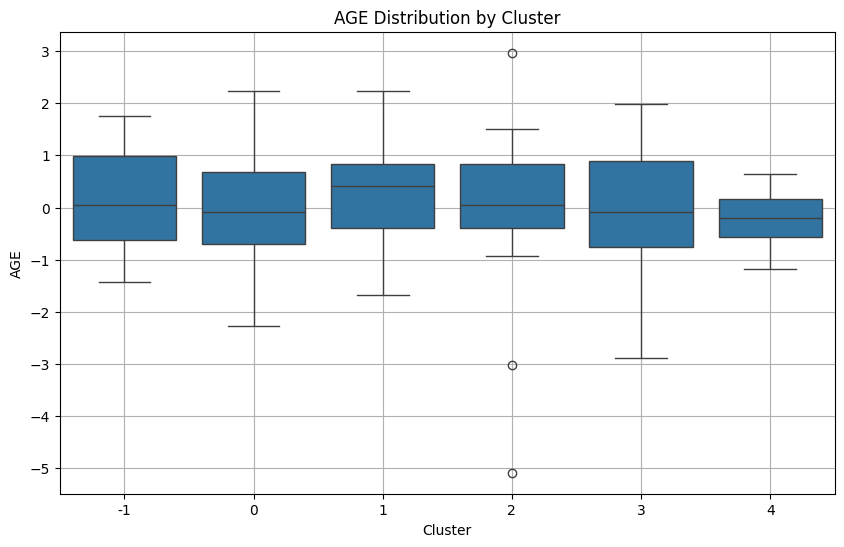

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_clusters, x='Cluster', y='AGE')
plt.title('AGE Distribution by Cluster')
plt.grid(True)
plt.show()


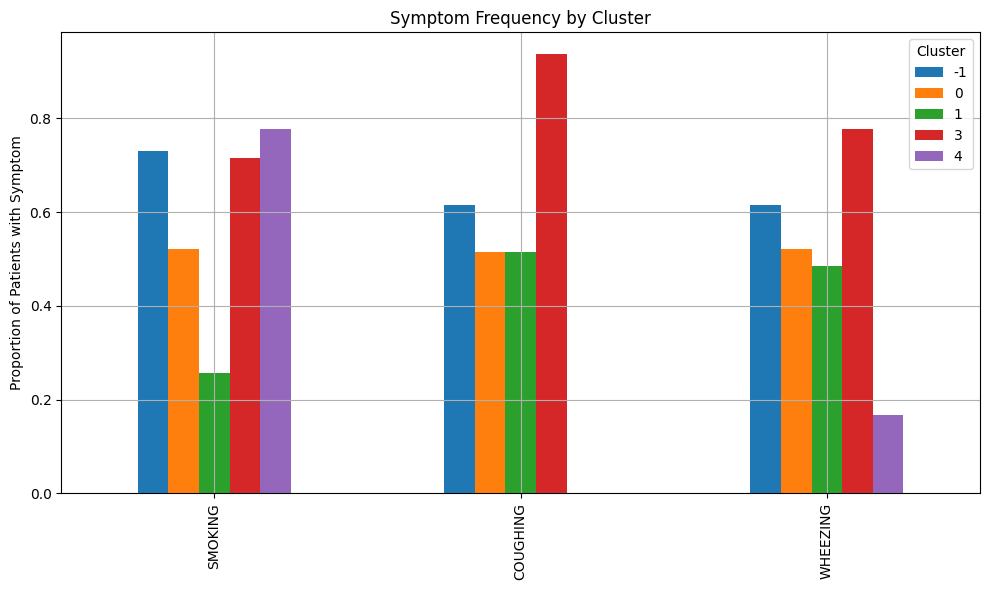

In [151]:
# Convert 1/2 to 0/1 if needed
binary_df = df_with_clusters.replace({1: 0, 2: 1})  # Only do this if your symptom values are 1/2
cluster_symptom_rates = binary_df.groupby('Cluster')[['SMOKING', 'COUGHING', 'WHEEZING']].mean()
cluster_symptom_rates.T.plot(kind='bar', figsize=(10, 6))
plt.title("Symptom Frequency by Cluster")
plt.ylabel("Proportion of Patients with Symptom")
plt.grid(True)
plt.tight_layout()
plt.show()


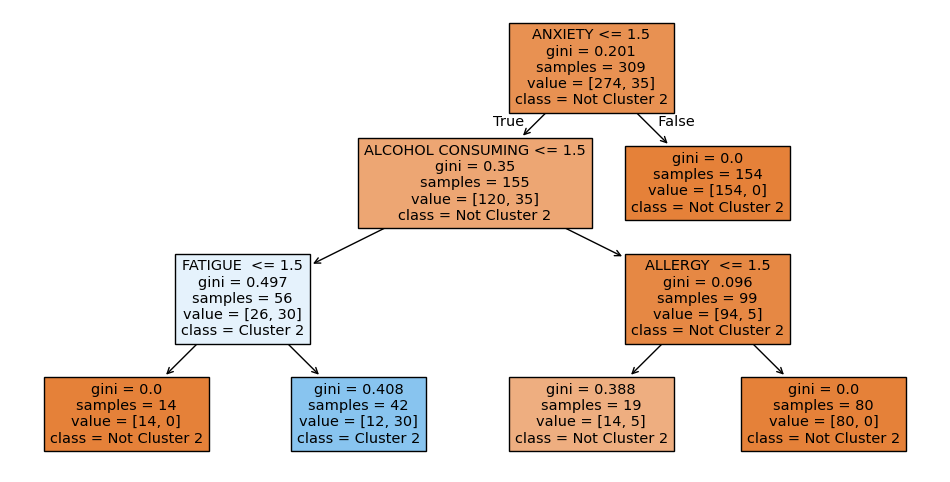

In [211]:
# Use a decision tree to separate clusters
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create binary target: is this Cluster 2 or not?
df_with_clusters['is_cluster_2'] = (df_with_clusters['Cluster'] == 2).astype(int)

X = df_with_clusters.drop(columns=['LUNG_CANCER', 'Cluster', 'is_cluster_2'])
y = df_with_clusters['is_cluster_2']

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=["Not Cluster 2", "Cluster 2"], filled=True)
plt.show()


## Using Lift to Measure Signal:

Lift is the ratio of a cluster's positive rate to the overall positive rate.

In [212]:
# Example cluster
cluster_yes_rate = 1.0  # e.g. 100% cancer in a cluster
lift = cluster_yes_rate / overall_cancer_rate
print(f"Lift: {lift:.2f}")

Lift: 1.14


# Modeling 

## Can I build a Machine Learning Model to help predict if a person between age 45-75 has cancer based on these features?

## Train Test Split before addressing class imbalance. 

In [ ]:
from sklearn.model_selection import train_test_split

#X = df_encoded.drop(['LUNG_CANCER'], axis=1) 

#y = df_encoded['LUNG_CANCER']
 


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=42)

# train_test_split and SMOTE to address class imbalance

In [213]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Your existing code
X = df_encoded.drop(['LUNG_CANCER'], axis=1) 
y = df_encoded['LUNG_CANCER']

# First split the data (with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42, 
                                                    stratify=y)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts(normalize=True))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Train the model on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
# Note: We evaluate on the original test set, not the resampled data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class distribution before SMOTE:
LUNG_CANCER
1    0.874494
0    0.125506
Name: proportion, dtype: float64

Class distribution after SMOTE:
LUNG_CANCER
1    0.5
0    0.5
Name: proportion, dtype: float64

Confusion Matrix:
[[ 5  3]
 [ 2 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62



### Here I use stratify=y to help address class imbalance. 

## Linear Regression or Classification? 
 

## Modeling

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Initializing the model 

lr = LinearRegression()

#Fitting the model
lr.fit(X_train_resampled, y_train_resampled )

#Making predictions on test data
y_pred = lr.predict(X_test)

#Check model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Print results 

print('Mean Squared Error', mse)
print('R2 score', r2)

Mean Squared Error 0.09141183749481968
R2 score 0.18660392747665067


## Linear Regression Model 2 Ridge

In [215]:
from sklearn.linear_model import Ridge 

#Initialize model
ridge = Ridge(alpha=.010)

#Fit model
ridge.fit(X_train_resampled, y_train_resampled )

#Predict
y_pred_ridge = ridge.predict(X_test)

#Check scores
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Mean Squared Error', mse_ridge)
print('R^2 Ridge Score', r2_ridge)

Ridge Mean Squared Error 0.0914099300464669
R^2 Ridge Score 0.1866209002346787


## Random Forest Reggression Model

In [218]:
from sklearn.ensemble import RandomForestRegressor


#initialize the random forest regressor

rf = RandomForestRegressor(n_estimators=10, max_depth=10,random_state=42)


#Train model
rf.fit(X_train_resampled, y_train_resampled)

#Make prediction
y_pred_rf = rf.predict(X_test)

#Check model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Rf Mean Squared Error', mse_rf)
print('Rf R2 Score', r2_rf)

Rf Mean Squared Error 0.10661290322580645
Rf R2 Score 0.05134259259259244


## Hyperparameter tunning

I am using randomizedsearch to reduce time needed to find optimal hyperparameters.

In [219]:
#Random Search 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform 

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0, 1)  # Fraction of features to consider at each split
}


# Instantiate the random search model
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3, 
    n_jobs=-1, 
    verbose=2, 
    scoring='neg_mean_squared_error',
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

# Feature importance
feature_importance = best_model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1} importance: {importance}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.9s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.0s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.0s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.7s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.7s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.7s
[CV] END max_depth=33, max_features=0.6508884729488529, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   1

## Visualizing Feature Importance 

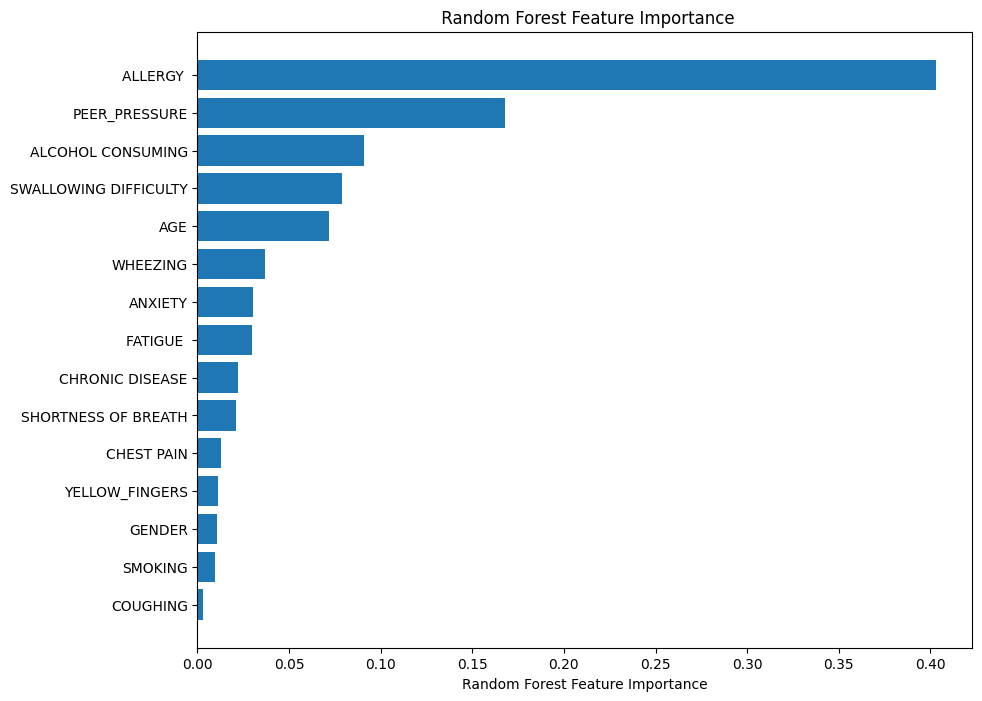

In [220]:
# Extract and plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx], fontsize=10)
plt.xlabel("Random Forest Feature Importance")

plt.title(' Random Forest Feature Importance')
plt.show()

## Observations:
Most important features used by the model in predicting lung cancer are ALLERGY, PEER PRESSURE and ALCOHOL CONSUMPTION

## Classification Model: Logistic Regression 

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [222]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine. I am also adding class_weight='balanced' to address class imbalance. 
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, class_weight='balanced')


#fit the model
logreg_model.fit(X_train_resampled, y_train_resampled)

#predict
y_pred = logreg_model.predict(X_test)

In [223]:
#Check model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9193548387096774
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62



## Observation:

Accuracy score is 91% but this is misleading since dataset is composed of 87% cancer patients. Better metrics are Precision and Recall scores. Class 0 which is patients without cancer has a decent precision score (71%) which means that 29% of patients labeld as NO cancer were false positive and did indeed have cancer! This is not good and I have to improve these metric scores. 

When it comes to classifying patients as YES cancer the model did great in precision but miss classified 5% of patients in this category as false negative (NO cancer) when they infact did have cancer. The model also had a recall score of 96% which means it correctly captured 96% of the True positive cases. 

In [224]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 5  3]
 [ 2 52]]


## Visualizing Feature Importance of Classification Model 

                       Coefficient  Importance
AGE                      -0.010096    0.010096
GENDER                    0.261555    0.261555
CHEST PAIN                0.478961    0.478961
SHORTNESS OF BREATH       0.486013    0.486013
ANXIETY                   0.958033    0.958033
WHEEZING                  1.047439    1.047439
SMOKING                   1.088975    1.088975
COUGHING                  1.153210    1.153210
SWALLOWING DIFFICULTY     1.418634    1.418634
YELLOW_FINGERS            1.422886    1.422886
ALLERGY                   1.804083    1.804083
ALCOHOL CONSUMING         1.881574    1.881574
FATIGUE                   1.896391    1.896391
PEER_PRESSURE             1.994623    1.994623
CHRONIC DISEASE           2.066392    2.066392


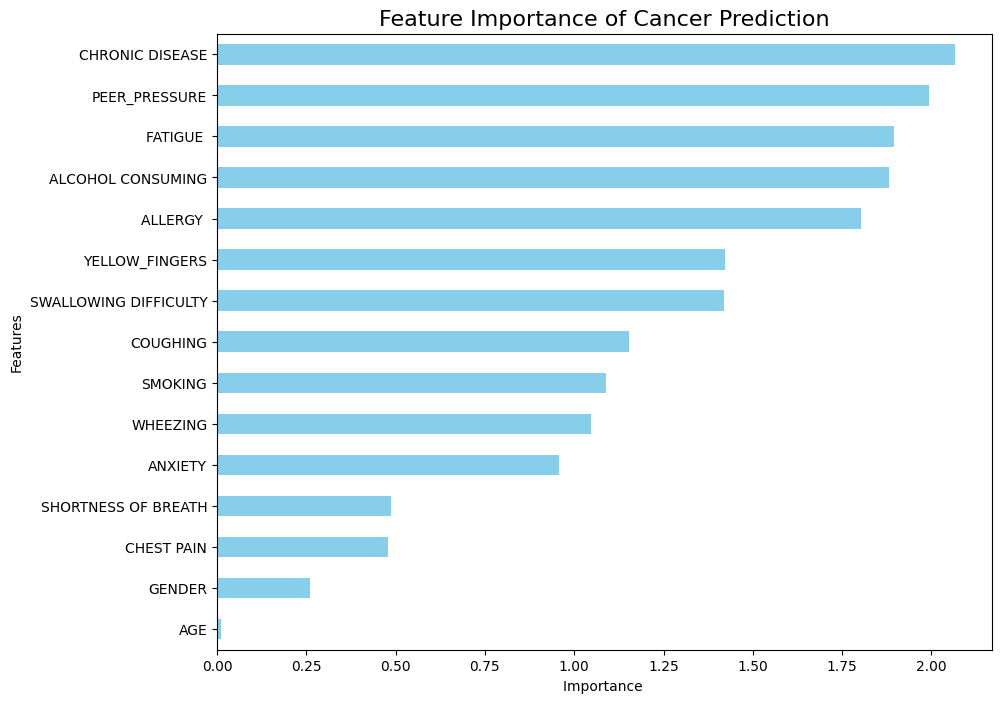

In [225]:


feature_names = X_train_resampled.columns

# Get the coefficients of the model (for binary classification, there is only one set of coefficients)
coefficients = logreg_model.coef_.flatten()

# Creating a DataFrame for better visualization
coeff_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# For better readability, you can take the absolute value of the coefficients
coeff_df['Importance'] = coeff_df['Coefficient'].abs()

# Sort by ascending
coeff_df = coeff_df.sort_values(by='Importance', ascending=True)

# Print or visualize the DataFrame
print(coeff_df)

# Plot the feature importances (absolute coefficients)
plt.figure(figsize=(10, 8))
coeff_df['Importance'].plot(kind='barh', color='skyblue')
plt.title('Feature Importance of Cancer Prediction', fontsize=16)
plt.xlabel('Importance ')
plt.ylabel('Features')
plt.show()


## Check if model is overfitting

In [226]:
# Check training accuracy
y_train_pred = logreg_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9560185185185185


In [227]:
# Check training accuracy
y_train = logreg_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already know the test accuracy
print(f"Test Accuracy: {accuracy}")

Training Accuracy: 0.9560185185185185
Test Accuracy: 0.9193548387096774


## Training accuracy is 95% and testing accuracy is only 91%. As mentioned earlier, accuracy is not an appropriate metric to use for this dataset. 

In [228]:
#Instantiate the model: I am using solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(C=.1, solver='lbfgs', random_state=42)


#fit the model
logreg_model.fit(X_train_resampled, y_train_resampled)

#predict
y_pred = logreg_model.predict(X_test)

In [229]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.9446137396418071


## Hyperparameter tunning on Log Reg model

In [230]:
# Hyperparameter grid
param_distributions = {
    'C': uniform(0.01, 100),  # C values between 0.01 and 100
    'penalty': ['l2'],  # Only L2 regularization since 'lbfgs' solver does not support L1
    'solver': ['lbfgs'],  # Solver choice
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [231]:
# Initialize the RandomizedSearchCV with Logistic Regression
random_search = RandomizedSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='recall',  # Optimize for recall since accuracy is not best metric for this dataset
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available cores
)

In [232]:
# Fit Randomized Search on training data

random_search.fit(X_train_resampled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1400da0f0>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=42, scoring='recall', verbose=1)

In [233]:
#Print best parameters

print('Best Parameters', random_search.best_params_)

#Print best cross-val score

print('Best Cross-Validation Score:', random_search.best_score_)

Best Parameters {'C': 37.464011884736244, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 1.0


In [234]:
# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62

Confusion Matrix:
[[ 4  4]
 [ 2 52]]


In [235]:
#Model with best params 
# LogisticRegression(C=37.464011884736244, class_weight='balanced',random_state=42)

#Best Params model 
Best_logreg_model = LogisticRegression(C=37.464011884736244, class_weight='balanced',random_state=42)


#fit the model
Best_logreg_model.fit(X_train_resampled, y_train_resampled)

#predict
y_pred = logreg_model.predict(X_test)

In [236]:
# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(Best_logreg_model, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.9261427425821973


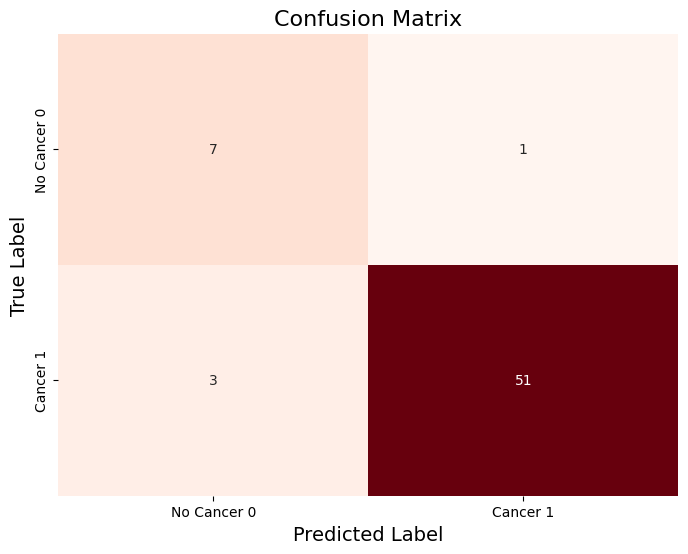

In [237]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['No Cancer 0', 'Cancer 1']

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the plot
plt.show()

In [238]:
# Evaluate the best model from RandomizedSearchCV on the test set
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(X_test)

# Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Test Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62

Confusion Matrix:
[[ 4  4]
 [ 2 52]]


# Final reflection on Results:

- Test accuracy of .90.3 is very high which means that the model correctlly classified the majority of patients.
- NO cancer precision score 67%. This means the model correctly captured 67% of patients who did NOT have lung cancer but miscalssified 33% of patients as NO lung cancer when they did have it.
- NO cancer recall score 50%. This means the model correctly predicted 50% of patients who did NOT have lung cancer. This could be improved but is a significant improvement since only 13% of the dataset were from patients with NO lung cancer. 
- The confusion matrix shows that the model correctly predicted every instance of Cancer from the data set and only missclassified 1 instance as having cancer incorrectly. 

Given the simplicity of this model it offers a cheap way of helping to screen older people based on the features of this dataset. These features could be used during screening and the model can be used as a quick way to evaluate if an elderly person might have cancer and not know it. 



# Next steps: 

- Dealing with imbalanced dataset. My dataset is imbalanced. There are far more instances of patients with cancer which means my model is biased since most of the data that it learned from was from patients who did have cancer. 87% of the data was from patients with cancer. Next steps will include applying Class Weighting method to give more importance to the minority of my training data which was patients who did not have cancer. 